In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [3]:
df = pd.read_excel('BANCO_DE_DADOS_KATIA.xlsx')

In [4]:
df.shape

(2481, 17)

In [5]:
df.drop(columns=["Cod",
                "Marcador",
                "NOME",
                "NOME_FANTASIA",
                "CNPJ",
                "ENDEREÇO"],
                axis=1,inplace=True)

In [6]:
df

,Setor,Seção_CNAE,Divisão_CNAE,Cod_Subclasse_CNAE,Descrição_Subclasse_CNAE,ABERTURA,PORTE,NATUREZA JURÍDICA,LOGADOURO,N_,BAIRRO
0,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.59-8-01,"Comércio varejista de artigos de tapeçaria, co...",1968-03-15 00:00:00,Micro empresa,213-5 - Empresário (Individual),AVENIDA DEZESSETE,1474,Centro
1,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.12-1-00,"Comércio varejista de mercadorias em geral, co...",1968-05-03 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,R QUATORZE,390,Centro
2,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.31-8-00,Comércio varejista de combustíveis para veícul...,1969-09-11 00:00:00,Empresa de pequeno porte,206-2 - Sociedade Empresária Limitada,AVENIDA SETE,780,Centro
3,Serviços,Atividades imobiliárias,Atividades imobiliárias,68.10-2-01,Compra e venda de imóveis próprios,1970-04-21 00:00:00,Demais,205-4 - Sociedade Anônima Fechada,RUA VINTE,1234,Centro
4,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.81-4-00,Comércio varejista de artigos do vestuário e a...,1970-05-21 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,AVENIDA DEZESSETE,1557,Centro
...,...,...,...,...,...,...,...,...,...,...,...
2476,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.44-0-01,Comércio varejista de ferragens e ferramentas,2022-12-22 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,R PADRE ANTONIO DIAS,912,Alcides Junqueira
2477,Serviços,Comércio; reparação de veículos automotores e ...,Comércio e reparação de veículos automotores e...,45.41-2-06,Comércio a varejo de peças e acessórios novos ...,2022-12-22 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,R TRINTA E SEIS,2156,Centro
2478,Serviços,"Transporte, armazenagem e correio",Transporte terrestre,49.30-2-02,"Transporte rodoviário de carga, exceto produto...",2022-12-26 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,AVENIDA AMAZONAS,85,Pirapitinga
2479,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.74-1-00,Comércio varejista de artigos de óptica,2022-12-26 00:00:00,Micro empresa,206-2 - Sociedade Empresária Limitada,R VINTE,1091,Centro


In [7]:
# correção maiúsculas
df['PORTE'] = df['PORTE'].replace('MICRO EMPRESA', 'Micro empresa')

In [8]:
# Converter a coluna 'Data' para o tipo datetime
df['ABERTURA'] = pd.to_datetime(df['ABERTURA'])

# Criar uma nova coluna 'Ano' com o ano extraído
df['Ano'] = df['ABERTURA'].dt.year

In [35]:
# Substituir categorias diferentes
df['Natureza Jurídica'] = df['NATUREZA JURÍDICA'].apply(lambda x: x if x in ['213-5 - Empresário (Individual)', '206-2 - Sociedade Empresária Limitada'] else 'Outros')
df['Bairro'] = df['BAIRRO'].apply(lambda x: x if x in ['Centro',
                                                        'Progresso',
                                                        'Platina',
                                                        'Setor Sul',
                                                        'Alcides Junqueira',
                                                        ] else 'Outros')

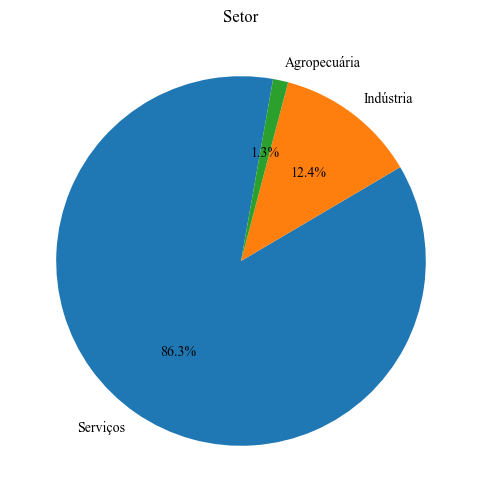

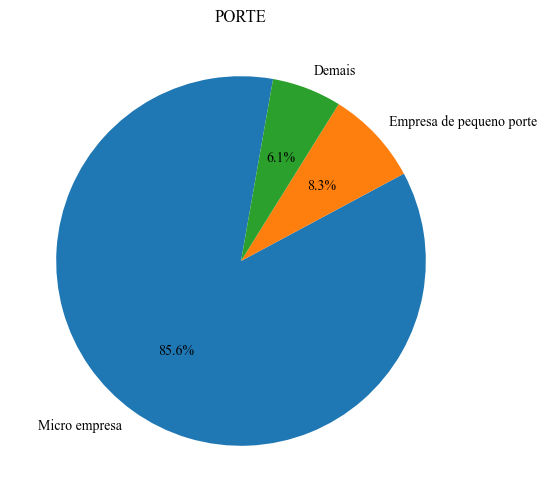

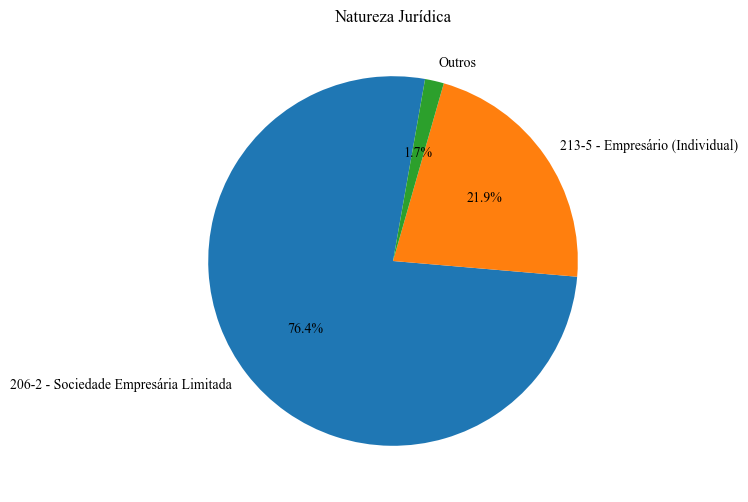

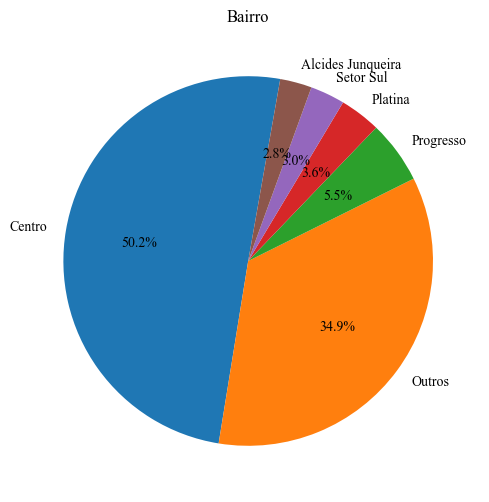

In [41]:
# Gráficos de pizza
colunas_pizza = ['Setor', 
                'PORTE',
                'Natureza Jurídica',
                'Bairro'
]

for coluna in colunas_pizza:
    plt.rcParams['font.family'] = 'Times New Roman'
    contagem_classes = df[coluna].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(contagem_classes, labels=contagem_classes.index, autopct='%1.1f%%', startangle=80)
    plt.title(f'{coluna}')
    plt.show()

### Característica média: 

Setor: serviços (86,3%)

Porte: micro empresa (85,6%)

Natureza jurídica: Sociedade empresária limitada (76,4%)

Bairro: Centro (50,2%)


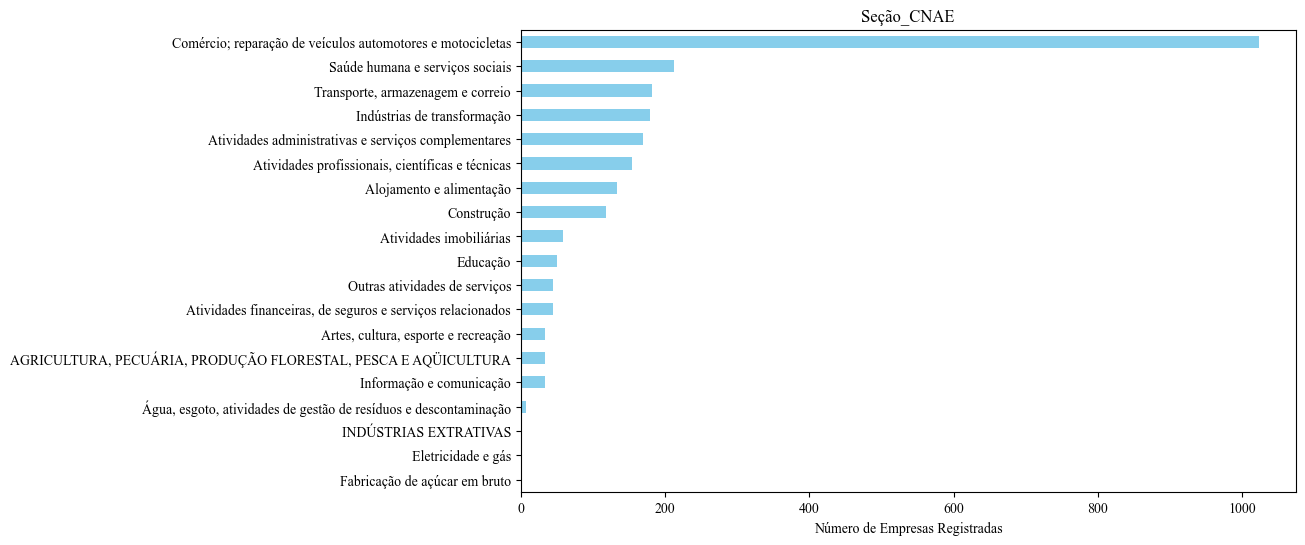

In [156]:
def plot_column_counts(df, column_name):
    # Contagem da coluna
    column_counts = df[column_name].value_counts()

    # Ordenando pela contagem em ordem decrescente
    column_counts = column_counts.sort_values(ascending=True)

    # Criando o gráfico de barras
    plt.figure(figsize=(10, 6))
    column_counts.plot(kind='barh', color='skyblue')

    # Adicionando rótulos e título
    plt.xlabel('Número de Empresas Registradas')
    plt.ylabel('')
    plt.title(f'{column_name}')

    # Exibindo o gráfico
    plt.show()

# Lista de colunas desejadas

colunas_barra = ['Seção_CNAE']

# Criando gráficos para cada coluna
for column in colunas_barra:
    plot_column_counts(df, column)


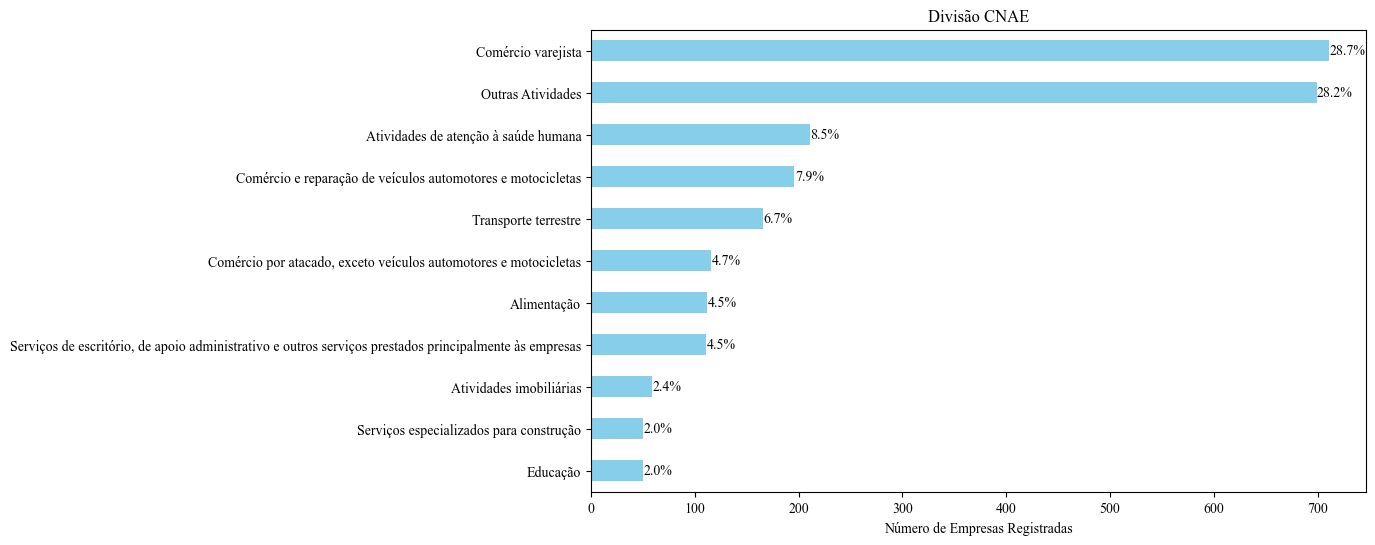

In [76]:
# Contagem da coluna
column_counts = df['Divisão_CNAE'].value_counts()

# Selecionando apenas as dez maiores contagens
top_classes = column_counts.head(10)


# Agrupando o restante como "outras atividades"
others_count = column_counts.iloc[10:].sum()
top_classes.loc['Outras Atividades'] = others_count
percentages = (top_classes / df['Divisão_CNAE'].shape[0]) * 100
# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
bars = top_classes.sort_values(ascending=True).plot(kind='barh', color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Número de Empresas Registradas')
plt.ylabel('')
plt.title('Divisão CNAE')

# Adicionando os percentuais nas barras com uma fonte menor (fontsize=8)
for bar, percent in zip(bars.patches, percentages.sort_values(ascending=True)):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f'{percent:.1f}%', 
             va='center', ha='left' if percent != 0 else 'right', fontsize=10, color='black')



# Exibindo o gráfico
plt.show()

In [11]:
# Função para criar tabela de percentuais
def criar_tabela_percentual(coluna):
    contagem = coluna.value_counts()
    percentual = contagem / len(coluna) * 100
    tabela_percentual = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})
    return tabela_percentual

# Criar tabelas para cada coluna do DataFrame
tabelas_percentuais = {coluna: criar_tabela_percentual(df[coluna]) for coluna in df.columns}

# Exibir tabelas percentuais
for coluna, tabela in tabelas_percentuais.items():
    print(f'Tabela de Percentual para a Coluna "{coluna}":\n')
    print(tabela)
    print('\n' + '-'*40 + '\n')


Tabela de Percentual para a Coluna "Setor":

              Contagem  Percentual (%)
Setor                                 
Serviços          2140       86.255542
Indústria          308       12.414349
Agropecuária        33        1.330109

----------------------------------------

Tabela de Percentual para a Coluna "Seção_CNAE":

                                                    Contagem  Percentual (%)
Seção_CNAE                                                                  
Comércio; reparação de veículos automotores e m...      1023       41.233374
Saúde humana e serviços sociais                          212        8.544942
Transporte, armazenagem e correio                        182        7.335752
Indústrias de transformação                              179        7.214833
Atividades administrativas e serviços complemen...       170        6.852076
Atividades profissionais, científicas e técnicas         154        6.207175
Alojamento e alimentação                           

In [12]:
# Função para criar tabela de percentuais
def criar_tabela_percentual(coluna, nome_coluna):
    contagem = coluna.value_counts()
    percentual = contagem / len(coluna) * 100
    tabela_percentual = pd.DataFrame({'Contagem': contagem, 'Percentual (%)': percentual})
    tabela_percentual['Coluna'] = nome_coluna  # Adiciona o nome da coluna ao DataFrame
    return tabela_percentual

# Criar tabelas para cada coluna do DataFrame
tabelas_percentuais = []  # Lista para armazenar os DataFrames individuais

for coluna in df.columns:
    tabela = criar_tabela_percentual(df[coluna], coluna)
    tabelas_percentuais.append(tabela)

# Exibir tabelas percentuais
for tabela in tabelas_percentuais:
    print(f'Tabela de Percentual para a Coluna "{tabela["Coluna"].iloc[0]}":\n')
    print(tabela)
    print('\n' + '-'*40 + '\n')


Tabela de Percentual para a Coluna "Setor":

              Contagem  Percentual (%) Coluna
Setor                                        
Serviços          2140       86.255542  Setor
Indústria          308       12.414349  Setor
Agropecuária        33        1.330109  Setor

----------------------------------------

Tabela de Percentual para a Coluna "Seção_CNAE":

                                                    Contagem  Percentual (%)   
Seção_CNAE                                                                     
Comércio; reparação de veículos automotores e m...      1023       41.233374  \
Saúde humana e serviços sociais                          212        8.544942   
Transporte, armazenagem e correio                        182        7.335752   
Indústrias de transformação                              179        7.214833   
Atividades administrativas e serviços complemen...       170        6.852076   
Atividades profissionais, científicas e técnicas         154        6.20

In [13]:
df_logradouro = pd.DataFrame(tabelas_percentuais[8])
df_bairro = pd.DataFrame(tabelas_percentuais[10])
df_ano = pd.DataFrame(tabelas_percentuais[11])

In [14]:
media = df_ano['Contagem'].sort_index().rolling(window=2).mean()
media

Ano
1968      NaN
1969      1.5
1970      2.0
1972      2.5
1973      4.0
1974      5.5
1975      4.5
1976      3.5
1977      3.0
1978      5.5
1979      7.5
1980      6.0
1981      4.0
1982      5.0
1983      7.0
1984     10.0
1985     13.0
1986     14.0
1987     15.0
1988     13.5
1989     13.5
1990     14.5
1991     15.5
1992     16.0
1993     15.5
1994     14.5
1995     16.0
1996     25.5
1997     28.0
1998     28.0
1999     32.5
2000     34.0
2001     31.0
2002     29.0
2003     33.5
2004     45.0
2005     51.5
2006     52.0
2007     62.0
2008     63.0
2009     69.5
2010     86.5
2011     99.5
2012     98.5
2013     88.0
2014     86.0
2015     90.5
2016     90.5
2017     77.5
2018    101.5
2019    140.5
2020    149.5
2021    182.5
2022    239.5
Name: Contagem, dtype: float64

In [15]:
df_ano.sort_values(by="Ano", ascending=True, inplace=True)
df_ano['media_movel'] = df_ano['Contagem'].rolling(window=2).mean()

In [16]:
df_ano

,Contagem,Percentual (%),Coluna,media_movel
Ano,,,,
1968,2,0.080613,Ano,NaN
1969,1,0.040306,Ano,1.5
1970,3,0.120919,Ano,2.0
1972,2,0.080613,Ano,2.5
1973,6,0.241838,Ano,4.0
1974,5,0.201532,Ano,5.5
1975,4,0.161225,Ano,4.5
1976,3,0.120919,Ano,3.5
1977,3,0.120919,Ano,3.0


In [159]:
df_ano

,Ano,Contagem,Percentual (%),Coluna,media_movel,periodo
0,1968,2,0.080613,Ano,NaN,1º Período
1,1969,1,0.040306,Ano,1.5,1º Período
2,1970,3,0.120919,Ano,2.0,1º Período
3,1972,2,0.080613,Ano,2.5,1º Período
4,1973,6,0.241838,Ano,4.0,1º Período
5,1974,5,0.201532,Ano,5.5,1º Período
6,1975,4,0.161225,Ano,4.5,1º Período
7,1976,3,0.120919,Ano,3.5,1º Período
8,1977,3,0.120919,Ano,3.0,1º Período
9,1978,8,0.322451,Ano,5.5,1º Período


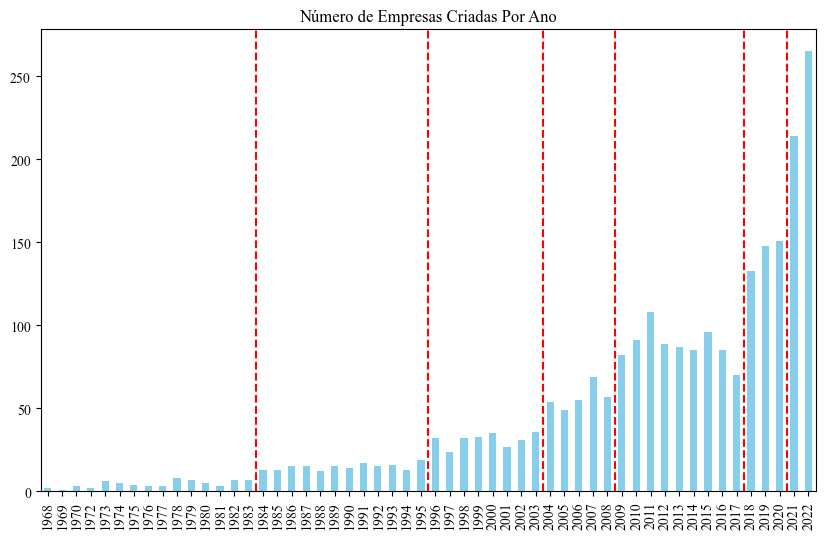

In [160]:
# Contagem da coluna
column_counts = df_ano['Contagem']

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
column_counts.plot(kind='bar', color='skyblue')

# Adicionando rótulos e título

plt.title('Número de Empresas Criadas Por Ano')

# Adicionando linha tracejada entre os anos
plt.axvline(x=14.5, color='red', linestyle='--')
plt.axvline(x=26.5, color='red', linestyle='--') 
plt.axvline(x=34.5, color='red', linestyle='--')
plt.axvline(x=39.5, color='red', linestyle='--')
plt.axvline(x=48.5, color='red', linestyle='--')
plt.axvline(x=51.5, color='red', linestyle='--')
 
# Exibindo o gráfico
plt.xticks(range(len(df_ano['Ano'])), df_ano['Ano'])
plt.show()



In [18]:
df_ano

,Contagem,Percentual (%),Coluna,media_movel
Ano,,,,
1968,2,0.080613,Ano,NaN
1969,1,0.040306,Ano,1.5
1970,3,0.120919,Ano,2.0
1972,2,0.080613,Ano,2.5
1973,6,0.241838,Ano,4.0
1974,5,0.201532,Ano,5.5
1975,4,0.161225,Ano,4.5
1976,3,0.120919,Ano,3.5
1977,3,0.120919,Ano,3.0


In [19]:
df_ano.reset_index(inplace=True)

# Se df_ano já existe
df_ano['periodo'] = (
    ['1º Período'] * df_ano[df_ano['Ano'].between(1968, 1983)].shape[0] +
    ['2º Período'] * df_ano[df_ano['Ano'].between(1984, 1995)].shape[0] +
    ['3º Período'] * df_ano[df_ano['Ano'].between(1996, 2003)].shape[0] +
    ['4º Período'] * df_ano[df_ano['Ano'].between(2004, 2008)].shape[0] +
    ['5º Período'] * df_ano[df_ano['Ano'].between(2009, 2017)].shape[0] +
    ['6º Período'] * df_ano[df_ano['Ano'].between(2018, 2020)].shape[0] +
    ['7º Período'] * df_ano[df_ano['Ano'].between(2021, 2022)].shape[0]
)

# Exibir o DataFrame
df_ano

,Ano,Contagem,Percentual (%),Coluna,media_movel,periodo
0,1968,2,0.080613,Ano,NaN,1º Período
1,1969,1,0.040306,Ano,1.5,1º Período
2,1970,3,0.120919,Ano,2.0,1º Período
3,1972,2,0.080613,Ano,2.5,1º Período
4,1973,6,0.241838,Ano,4.0,1º Período
5,1974,5,0.201532,Ano,5.5,1º Período
6,1975,4,0.161225,Ano,4.5,1º Período
7,1976,3,0.120919,Ano,3.5,1º Período
8,1977,3,0.120919,Ano,3.0,1º Período
9,1978,8,0.322451,Ano,5.5,1º Período


In [20]:
resultados = df_ano.groupby('periodo')['Contagem'].mean().reset_index()

# Exibindo os resultados
resultados = pd.DataFrame(resultados)
resultados

,periodo,Contagem
0,1º Período,4.400000
1,2º Período,14.750000
2,3º Período,31.250000
3,4º Período,56.800000
4,5º Período,88.111111
5,6º Período,144.000000
6,7º Período,239.500000


In [162]:
resultados.to_excel('periodos.xlsx', index=False)

### Número médio de empresas criadas por período:

A análise visual do número de empresas criadas revela sete períodos de crescimento:

1º Período: 1968 - 1983 (4,4) 
- Crescimento baixo, estagnado, concentrado no bairro centro.

2º Período: 1984 - 1995 (14,75)
- Crescimento baixo, concentrado no centro e alguma dispersão em Platina e Progresso.

3º Período: 1996 - 2003 (31,25)
-  Cresciemento médio-baixo, Centro e Progresso.

4º Período: 2004 - 2008 (56,8)
- Crescimento médio, concentração no Centro mas com dispersão em Progresso, Platina, Ipiranga e Setor Norte.

5º Período: 2009 - 2017 (88,1)
 - Crescimento médio-alto, concentração no Centro porém com dispersão maias ampla em Progresso, Setor Sul (pela primeira vez*), Platina, Pirapitinga, Alcides Junqueira, Setor Norte, Lagoa Azul, Marta Helena, Distrito Industrial, Alvorada, Ipiranga, Paranaiba,Camargo e Independencia.    

6º Período: 2018 - 2020 (144,0)
- Crescimento alto, porém menos disperso, concentração no Centro e alguma disperção em Progresso, Alcides Junqueira, Platina, Independência, Setor Sul e Pirapitinga.

7º Período: 2021 - 2022 (239,5)
- Alto crescimento com disperção média, concentração no Centro e disperção em Progresso, Setor Sul, Platina, Alcides Junqueira, Pirapitinga, Setor Norte, Universitário, Maria Vilela (primeira vez*), e Lagoa Azul.


### Análise por período:

Bairros:

Tipo:

In [21]:
# Se df já existe
df['periodo'] = (
    ['1º Período'] * df[df['Ano'].between(1968, 1983)].shape[0] +
    ['2º Período'] * df[df['Ano'].between(1984, 1995)].shape[0] +
    ['3º Período'] * df[df['Ano'].between(1996, 2003)].shape[0] +
    ['4º Período'] * df[df['Ano'].between(2004, 2008)].shape[0] +
    ['5º Período'] * df[df['Ano'].between(2009, 2017)].shape[0] +
    ['6º Período'] * df[df['Ano'].between(2018, 2020)].shape[0] +
    ['7º Período'] * df[df['Ano'].between(2021, 2022)].shape[0]
)

# Exibir o DataFrame
df

,Setor,Seção_CNAE,Divisão_CNAE,Cod_Subclasse_CNAE,Descrição_Subclasse_CNAE,ABERTURA,PORTE,NATUREZA JURÍDICA,LOGADOURO,N_,BAIRRO,Ano,periodo
0,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.59-8-01,"Comércio varejista de artigos de tapeçaria, co...",1968-03-15,Micro empresa,213-5 - Empresário (Individual),AVENIDA DEZESSETE,1474,Centro,1968,1º Período
1,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.12-1-00,"Comércio varejista de mercadorias em geral, co...",1968-05-03,Micro empresa,206-2 - Sociedade Empresária Limitada,R QUATORZE,390,Centro,1968,1º Período
2,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.31-8-00,Comércio varejista de combustíveis para veícul...,1969-09-11,Empresa de pequeno porte,206-2 - Sociedade Empresária Limitada,AVENIDA SETE,780,Centro,1969,1º Período
3,Serviços,Atividades imobiliárias,Atividades imobiliárias,68.10-2-01,Compra e venda de imóveis próprios,1970-04-21,Demais,205-4 - Sociedade Anônima Fechada,RUA VINTE,1234,Centro,1970,1º Período
4,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.81-4-00,Comércio varejista de artigos do vestuário e a...,1970-05-21,Micro empresa,206-2 - Sociedade Empresária Limitada,AVENIDA DEZESSETE,1557,Centro,1970,1º Período
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2476,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.44-0-01,Comércio varejista de ferragens e ferramentas,2022-12-22,Micro empresa,206-2 - Sociedade Empresária Limitada,R PADRE ANTONIO DIAS,912,Alcides Junqueira,2022,7º Período
2477,Serviços,Comércio; reparação de veículos automotores e ...,Comércio e reparação de veículos automotores e...,45.41-2-06,Comércio a varejo de peças e acessórios novos ...,2022-12-22,Micro empresa,206-2 - Sociedade Empresária Limitada,R TRINTA E SEIS,2156,Centro,2022,7º Período
2478,Serviços,"Transporte, armazenagem e correio",Transporte terrestre,49.30-2-02,"Transporte rodoviário de carga, exceto produto...",2022-12-26,Micro empresa,206-2 - Sociedade Empresária Limitada,AVENIDA AMAZONAS,85,Pirapitinga,2022,7º Período
2479,Serviços,Comércio; reparação de veículos automotores e ...,Comércio varejista,47.74-1-00,Comércio varejista de artigos de óptica,2022-12-26,Micro empresa,206-2 - Sociedade Empresária Limitada,R VINTE,1091,Centro,2022,7º Período


In [85]:
# Agrupe o DataFrame df pelo período e conte os valores únicos na coluna "BAIRRO"
contagem_bairros = df.groupby("periodo")["BAIRRO"].value_counts()

# Exiba o resultado
contagem_bairros = pd.DataFrame(contagem_bairros)
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
        print(contagem_bairros)

                                              count
periodo    BAIRRO                                  
1º Período Centro                                42
           Progresso                              4
           Maria Vilela                           3
           Gardenia                               2
           Platina                                2
           Ipiranga                               2
           Paranaiba                              2
           Novo Mundo                             1
           Nossa Senhora Aparecida                1
           Lagoa Azul                             1
           Setor Norte                            1
           Setor Sul                              1
           Sol Nascente II                        1
           Setor Norte Industrial                 1
           Area Rural de Ituiutaba                1
           Alvorada                               1
2º Período Centro                               107
           P

In [165]:
tabela_pivot.to_excel('bairro_periodo.xlsx')

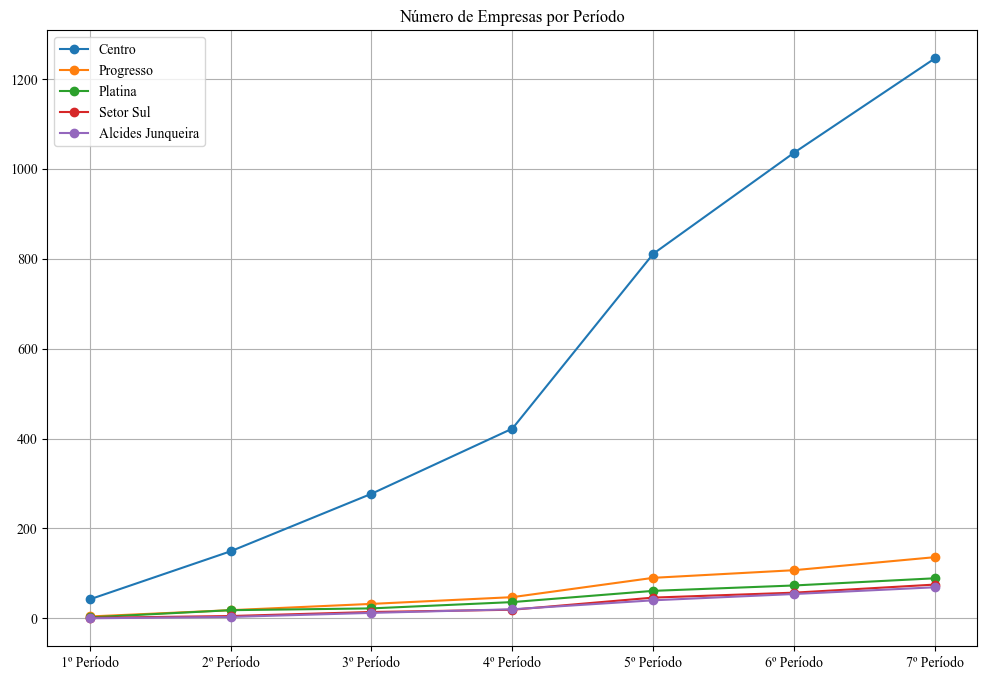

In [163]:
# Seleciona os dez primeiros bairros
top_10_bairros = tabela_pivot.drop('Total', axis=1).head(5)


# Calcula o somatório acumulado entre os períodos para cada bairro
top_10_bairros_acumulado = top_10_bairros.cumsum(axis=1)

# Plota o gráfico de linha com o somatório acumulado
plt.figure(figsize=(12, 8))

for bairro in top_10_bairros_acumulado.index:
    plt.plot(top_10_bairros_acumulado.columns, top_10_bairros_acumulado.loc[bairro], label=bairro, marker='o')

plt.title('Número de Empresas por Período')
plt.legend()
plt.grid(True)
plt.show()

O bairro Centro é disparado a região mais concentrada e de maior crescimento, o quê é esperado de uma região central.

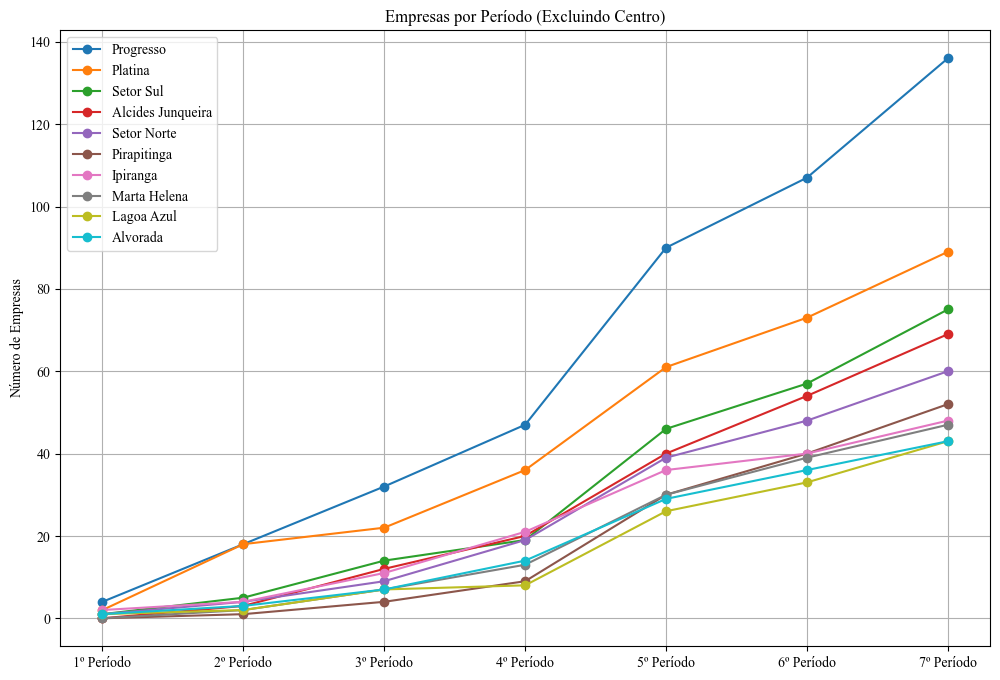

In [132]:
# Exclui o bairro 'Centro' e seleciona os dez primeiros bairros (excluindo a coluna 'Total')
top_10_bairros = tabela_pivot.drop('Centro', errors='ignore', axis=0).drop('Total', axis=1).head(10)

# Calcula o somatório acumulado entre os períodos para cada bairro
top_10_bairros_acumulado = top_10_bairros.cumsum(axis=1)

# Plota o gráfico de linha com o somatório acumulado
plt.figure(figsize=(12, 8))

for bairro in top_10_bairros_acumulado.index:
    plt.plot(top_10_bairros_acumulado.columns, top_10_bairros_acumulado.loc[bairro], label=bairro, marker='o')

plt.title('Empresas por Período (Excluindo Centro)')
plt.ylabel('Número de Empresas')
plt.legend()
plt.grid(True)
plt.show()

Excluindo o bairro Centro, visualizamos maiores crescimentos em Progresso e Platina.

### Análise de Agrupamentos

C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

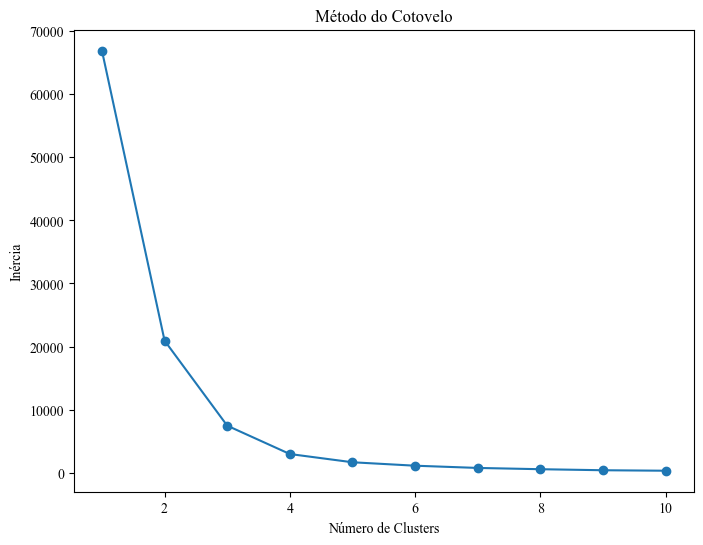

In [137]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Função para calcular a inércia para diferentes números de clusters
def calcular_inercia(data, max_clusters):
    inercia = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        inercia.append(kmeans.inertia_)
    return inercia

# Escolha do número máximo de clusters a serem testados
max_clusters = 10

# Calcular a inércia para diferentes números de clusters
inercia = calcular_inercia(X, max_clusters)

# Plotar a curva do método do cotovelo
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()


In [168]:
# Número de clusters desejados
num_clusters = 5

# Selecionar a coluna desejada
X = df_bairro[['Contagem']]

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_bairro['cluster'] = kmeans.fit_predict(X)

# Visualizar os resultados
print(df_bairro)
df_bairro['cluster'].value_counts()
print(kmeans.cluster_centers_)

                    Contagem  Percentual (%)  Coluna  cluster
BAIRRO                                                       
Centro                  1246       50.221685  BAIRRO        1
Progresso                136        5.481661  BAIRRO        3
Platina                   89        3.587263  BAIRRO        2
Setor Sul                 75        3.022975  BAIRRO        2
Alcides Junqueira         69        2.781137  BAIRRO        2
...                      ...             ...     ...      ...
Jardim Jamila              1        0.040306  BAIRRO        0
Cristina                   1        0.040306  BAIRRO        0
Manoel A. Cancella         1        0.040306  BAIRRO        0
Sol Nascente II            1        0.040306  BAIRRO        0
Morada do Sol              1        0.040306  BAIRRO        0

[72 rows x 4 columns]
[[   6.63636364]
 [1246.        ]
 [  73.25      ]
 [ 136.        ]
 [  40.09090909]]


C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [169]:
df_bairro

,Contagem,Percentual (%),Coluna,cluster
BAIRRO,,,,
Centro,1246,50.221685,BAIRRO,1
Progresso,136,5.481661,BAIRRO,3
Platina,89,3.587263,BAIRRO,2
Setor Sul,75,3.022975,BAIRRO,2
Alcides Junqueira,69,2.781137,BAIRRO,2
...,...,...,...,...
Jardim Jamila,1,0.040306,BAIRRO,0
Cristina,1,0.040306,BAIRRO,0
Manoel A. Cancella,1,0.040306,BAIRRO,0


In [170]:
df_bairro.to_excel("df_bairro_cluster.xlsx")

In [152]:
# Número de clusters desejados
num_clusters = 4

# Selecionar a coluna desejada
X = df_logradouro[['Contagem']]

# Aplicar o algoritmo K-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_logradouro['cluster'] = kmeans.fit_predict(X)

# Visualizar os resultados
print(df_logradouro)
df_logradouro['cluster'].value_counts()
print(kmeans.cluster_centers_)

                               Contagem  Percentual (%)     Coluna  cluster
LOGADOURO                                                                  
AVENIDA DEZESSETE                   156        6.287787  LOGADOURO        2
AVENIDA QUINZE                       56        2.257154  LOGADOURO        1
R VINTE                              55        2.216848  LOGADOURO        1
AVENIDA NOVE                         55        2.216848  LOGADOURO        1
AVENIDA TRINTA E UM                  54        2.176542  LOGADOURO        1
...                                 ...             ...        ...      ...
R ALVARES MACIEL                      1        0.040306  LOGADOURO        0
R MONTE ALEGRE                        1        0.040306  LOGADOURO        0
AVENIDA AUGUSTO VILELA MORAES         1        0.040306  LOGADOURO        0
RUA PRATA                             1        0.040306  LOGADOURO        0
R PADRE ANTONIO DIAS                  1        0.040306  LOGADOURO        0

[574 rows x

C:\Users\mauri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [172]:
df_logradouro.to_excel('df_logradouro_cluster.xlsx')